In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Data = pd.read_csv('G:\\Other computers\\My Laptop\\FishIsland_2017\\TagluStationData/Hourly_Data.csv',
                   index_col='datetime',parse_dates={'datetime':['Year','Month','Day','Time']})
Data = Data.resample('D').mean()

Snow = pd.read_csv('C:\\Users\\User\\Google Drive\\earthengine/NDSI_FP_New (1).csv',
                   na_values='-9999',index_col='datetime',parse_dates={'datetime':['date']})
# NDVI.columns#['ndvi_FI']


NDVI = pd.read_csv('C:\\Users\\User\\Google Drive\\earthengine/NDVI_NBAR_FP_New (1).csv',
                   na_values='-9999',index_col='datetime',parse_dates={'datetime':['date']})



Snow = pd.read_csv('Snow_Cover.csv',
                   na_values='-9999',index_col='datetime',parse_dates={'datetime':['Date']})
# Snow
Data

,JD,Air Temp,Rainfall,Wind Speed,Wind direction,Net SW Radiation,Net LW Radiation,Net Radiation
datetime,,,,,,,,
2008-08-28,241.0,5.145833,0.000000,2.283333,55.559542,35.564583,-11.606667,23.962500
2008-08-29,242.0,2.708333,0.000000,3.333333,317.183292,52.272917,-12.981250,39.284583
2008-08-30,243.0,1.600000,0.004167,3.312500,333.770833,75.683750,-18.382917,57.293750
2008-08-31,244.0,1.691667,0.000000,2.491667,309.560167,37.067917,-10.593333,26.478750
2008-09-01,245.0,2.208333,0.000000,1.170833,208.755083,24.193750,-7.712917,16.483333
...,...,...,...,...,...,...,...,...
2020-08-07,220.0,14.845833,0.000000,4.362500,88.475000,159.677500,-52.852500,106.833750
2020-08-08,221.0,9.920833,0.000000,5.479167,232.850000,85.963333,-13.358750,72.601667
2020-08-09,222.0,8.308333,0.000000,7.254167,286.337500,93.037917,-12.815417,80.219583


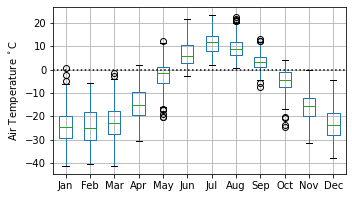

In [2]:
fig,axes = plt.subplots(1,1,figsize=(5,3),sharex=True)

ax = axes#[0]

Year = Data.groupby(Data.index.month).median()#.rolling(7).mean()#$.resample('7D').mean()

BP = Data[['Air Temp']].copy()

BP['Month'] = BP.index.month

BP = BP.sort_values(by='Month')

Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# for i in range(1,13):
#     BP.loc[BP['Month']==i,'Month']=Months[i-1]
# print(BP)

Year['RN'] = Data.groupby(Data.index.month).median()['Net SW Radiation']
Year['RNMx'] = Data.groupby(Data.index.month).quantile(0)['Net SW Radiation']
Year['RNMn'] = Data.groupby(Data.index.month).quantile(1)['Net SW Radiation']

# asymmetric_error = [(Year['RNMn']-Year['RN'])*-1, Year['RNMx']-Year['RN']]


# ax.2errorbar(Year.index,Year['Air Temp'],yerr=asymmetric_error,color='k',label='Temperature',
#             capsize=5, elinewidth=1,marker='o')
BP.boxplot(by=['Month'],ax=ax)


ax.plot([0,13],[0,0],linestyle=':',color='k')

ax.set_xlim(0.5,12.5)
ax.set_ylabel('Air Temperature $^\circ$C',fontsize=10)

# ax2=ax.twinx()
# ax2.fill_between(Year.index,Year['RNMx'],Year['RNMn'],alpha = .2,edgecolor='k')
# ax2.plot(Year['RN'],color='b')

ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(Months)##,minor=True)

ax.set_xlabel('')
ax.set_title('')
plt.suptitle('')
# ax.grid()



plt.tight_layout()
plt.savefig('C:\\Users\\User\\Google Drive\\PhD_Thesis/Seasons.png',dpi=600)

In [14]:
Months=Data.resample('M').sum()['Rainfall']
Months.groupby(Months.index.month).median()*24#.groupby(Data.index.month).sum()['Rainfall'])

datetime
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      2.300000
6      9.500000
7     29.454545
8     33.600000
9     22.450000
10     3.200000
11     0.000000
12     0.000000
Name: Rainfall, dtype: float64

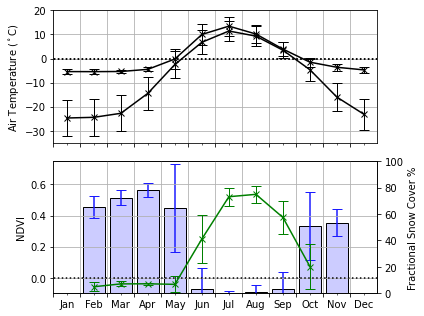

In [100]:
fig,axes = plt.subplots(2,1,figsize=(6,4.5),sharex=True)

ax = axes[0]

Year = Data.groupby(Data.index.month).mean()#.rolling(7).mean()#$.resample('7D').mean()
Year['AirS'] = Data.groupby(Data.index.month).std()['Air Temp']
Year['AirQ25'] = Data.groupby(Data.index.month).std()['Air Temp']
Year['Air75'] = Data.groupby(Data.index.month).std()['Air Temp']

asymmetric_error = [Year['AirQ25'], Year['Air75']]

Year['SWS'] = Data.groupby(Data.index.month).std()['Net SW Radiation']
Year['RNS'] = Data.groupby(Data.index.month).std()['Net Radiation']

Year['Soil'] = Data2.groupby(Data2.index.month).mean()['soil_temperature_level_2']-273.15
Year['Soils'] = Data2.groupby(Data2.index.month).std()['soil_temperature_level_2']

Year['RainS'] = Data.groupby(Data.index.month).std()['Rainfall']
Year['Rainfall'] = Data.groupby(Data.index.month).sum()['Rainfall']

Year['NDVI'] = NDVI['ndvi_FI'].groupby(NDVI.index.month).mean()
Year['NDVIS'] =  NDVI['ndvi_FI'].groupby(NDVI.index.month).std()
Year['NSDI'] = Snow['NDSI_Snow_Cover'].groupby(Snow.index.month).mean()
Year['NSDIS'] =  Snow['NDSI_Snow_Cover'].groupby(Snow.index.month).std()

Year['NSDI']*=[np.nan,1,1,1,1,1,1,1,1,1,1,np.nan]

Year.index+=.5

ax.errorbar(Year.index,Year['Air Temp'],yerr=Year['AirS'],color='k',label='Temperature',
            capsize=5, elinewidth=1,marker='x')
ax.plot([0,13],[0,0],linestyle=':',color='k')


ax.errorbar(Year.index,Year['Soil'],yerr=Year['Soils'],color='k',label='Temperature',
            capsize=5, elinewidth=1,marker='x')
ax.plot([0,13],[0,0],linestyle=':',color='k')

# ax2= ax.twinx()

# ax2.errorbar(Year.index,Year['Net Radiation'],yerr=Year['RNS'],color='k',label='RN',
#             capsize=5, elinewidth=1,marker='x')
# ax2.bar(Year.index,Year['Net Radiation'],yerr=Year['RNS'],label='NSDI',color=[.9,.78,.2],
#              capsize=5,edgecolor='k',ecolor=[.8,.68,.2])

ax.set_xlim(1,13)
ax.set_ylabel('Air Temperature ($^\circ$C)',fontsize=10)
ax2.set_ylabel('Net Radiation W m$^{-2}$',fontsize=10)

ax.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax.patch.set_visible(False)  # prevents ax1 from hiding ax2

Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']



ax.grid()
ax.set_ylim(-35,20)
ax2.set_ylim(0,250)


ax = axes[1]


ax.errorbar(Year.index,Year['NDVI'],yerr=Year['NDVIS'],color='green',label='Temperature',
            capsize=5, elinewidth=1,marker='x')
ax.plot([0,13],[0,0],linestyle=':',color='k')


ax2= ax.twinx()
ax2.bar(Year.index,Year['NSDI'],yerr=Year['NSDIS'],label='NSDI',color=[.8,.8,1],
             capsize=5,edgecolor='k',ecolor=[.1,.1,1])

ax.set_xlim(1,13)
ax.set_ylabel('NDVI',fontsize=10)
ax2.set_ylabel('Fractional Snow Cover %',fontsize=10)

ax.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax.patch.set_visible(False)  # prevents ax1 from hiding ax2

Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


ax.set_xticks(np.arange(1,13))
ax.set_xticklabels([])

ax.set_xticks(np.arange(1.5,13),minor=True)
ax.set_xticklabels(Months,minor=True)

# ax2.set_ylabel('NSDI',fontsize=12)

ax.grid()
# ax2.grid()
ax.set_ylim(-.1,.75)
ax2.set_ylim(0,100)




plt.tight_layout()
plt.savefig('C:\\Users\\User\\Google Drive\\PhD_Thesis/Seasons.png',dpi=600)

In [126]:
print(Data.loc[Data.index=='2017-10-1'].index.dayofyear)
print(Data.loc[Data.index=='2017-08-31'].index.dayofyear)
print(Data.loc[Data.index=='2017-06-15'].index.dayofyear)
print(Data.loc[Data.index=='2017-05-15'].index.dayofyear)

Int64Index([274], dtype='int64', name='datetime')
Int64Index([243], dtype='int64', name='datetime')
Int64Index([166], dtype='int64', name='datetime')
Int64Index([135], dtype='int64', name='datetime')


C:\Users\User\AppData\Local\Temp/ipykernel_15976/2854471756.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Months,minor=True)


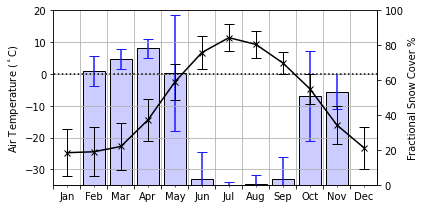

In [44]:


fig,axes = plt.subplots(1,1,figsize=(6,3),sharex=True)


ax = axes#[0]

# Data = Data.resample('7D').mean()
Year = Data.groupby(Data.index.month).mean()#.rolling(7).mean()#$.resample('7D').mean()
Year['AirS'] = Data.groupby(Data.index.month).std()['Air Temp']
Year['SWS'] = Data.groupby(Data.index.month).std()['Net Radiation']

Year['NDVI'] = NDVI['ndvi_FI'].groupby(NDVI.index.month).mean()
Year['NDVIS'] =  NDVI['ndvi_FI'].groupby(NDVI.index.month).std()
Year['NSDI'] = Snow['NDSI_Snow_Cover'].groupby(Snow.index.month).mean()
Year['NSDIS'] =  Snow['NDSI_Snow_Cover'].groupby(Snow.index.month).std()

Year['NSDI']*=[np.nan,1,1,1,1,1,1,1,1,1,1,np.nan]

Year.index+=.5

ax.errorbar(Year.index,Year['Air Temp'],yerr=Year['AirS'],color='k',label='Temperature',
            capsize=5, elinewidth=1,marker='x')
ax.plot([0,13],[0,0],linestyle=':',color='k')


ax2= axes.twinx()
# ax2.errorbar(Year.index,Year['NSDI'],yerr=Year['NSDIS'],label='NSDI',color='blue',
#              capsize=5, elinewidth=1,marker='o')
ax2.bar(Year.index,Year['NSDI'],yerr=Year['NSDIS'],label='NSDI',color=[.8,.8,1],
             capsize=5,edgecolor='k',ecolor=[.1,.1,1])


# Med = Snow['NDSI_Snow_Cover'].groupby(Snow.index.month).median()#.rolling(7,center=True).mean()
# Q25 = Snow['NDSI_Snow_Cover'].groupby(Snow.index.month).quantile(.05)#.rolling(7,center=True).mean()
# Q75 = Snow['NDSI_Snow_Cover'].groupby(Snow.index.month).quantile(.95)#.rolling(7,center=True).mean()
# ax2.plot(Med)
# ax2.fill_between(Q25.index.astype(float), Q25, Q75, alpha=0.2)




Spring=135/365*13
Summer=166/365*13
Fall=243/365*13
Winter=274/365*13


Spring=5.5#135/365*13
Summer=6.5#166/365*13
Fall=9#243/365*13
Winter=10#274/365*13



# ax.axvspan(0, Spring, alpha=0.25, color=[.9,.9,.9])
# ax.axvspan(Spring, Summer, alpha=0.25, color='blue')
# ax.axvspan(Summer, Fall, alpha=0.25, color='green')
# ax.axvspan(Fall, Winter, alpha=0.25, color='orange')
# ax.axvspan(Winter, 13, alpha=0.25, color=[.9,.9,.9])

ax.set_xlim(1,13)
ax.set_ylabel('Air Temperature ($^\circ$C)',fontsize=10)
ax2.set_ylabel('Fractional Snow Cover %',fontsize=10)

ax.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax.patch.set_visible(False)  # prevents ax1 from hiding ax2

Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


ax.set_xticks(np.arange(1,13))
ax.set_xticklabels([])

ax.set_xticklabels(Months,minor=True)
ax.set_xticks(np.arange(1.5,13),minor=True)

# ax2.set_ylabel('NSDI',fontsize=12)

ax.grid()
# ax2.grid()
ax.set_ylim(-35,20)
ax2.set_ylim(0,100)

plt.tight_layout()
plt.savefig('C:\\Users\\User\\Google Drive\\PhD_Thesis/Seasons.png',dpi=600)

In [7]:
# print(Data['Rainfall'])

C:\Users\User\AppData\Local\Temp/ipykernel_27220/1089671462.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Months,minor=True)


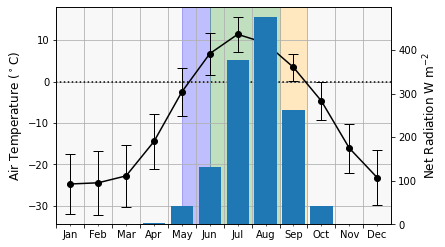

In [264]:
fig,ax = plt.subplots(1,1,figsize=(6,4),sharex=True)
axes = [ax]#es[0]

# Data = Data.resample('7D').mean()
Year = Data.groupby(Data.index.month).mean()#.rolling(7).mean()#$.resample('7D').mean()
Year['AirS'] = Data.groupby(Data.index.month).std()['Air Temp']
Year['Rainfall'] = Data.groupby(Data.index.month).sum()['Rainfall']
Year['SWS'] = Data.groupby(Data.index.month).std()['Net Radiation']

Year['NDVI'] = NDVI['ndvi_FI'].groupby(NDVI.index.month).mean()
Year['NDVIS'] =  NDVI['ndvi_FI'].groupby(NDVI.index.month).std()
Year['NSDI'] = Snow['NDSI_FI'].groupby(Snow.index.month).mean()
Year['NSDIS'] =  Snow['NDSI_FI'].groupby(Snow.index.month).std()

Year['NSDI']*=[np.nan,1,1,1,1,1,1,1,1,1,np.nan,np.nan]

Year.index+=.5

ax.errorbar(Year.index,Year['Air Temp'],yerr=Year['AirS'],color='k',label='Temperature',
            capsize=5, elinewidth=1,marker='o')
ax.plot([0,13],[0,0],linestyle=':',color='k')

ax1 = axes[0].twinx()
ax1.bar(Year.index,Year['Rainfall'])
# ax1.errorbar(Year.index,Year['Net Radiation'],yerr=Year['SWS'],color='k',label='NR',
#             capsize=5, elinewidth=1,marker='o')

# ax.errorbar(Year.index,Year['Air Temp'],yerr=Year['AirS'],color='k',label='Temperature',
#             capsize=5, elinewidth=1,marker='o')

# ax2= axes[0].twinx()
# ax2.errorbar(Year.index,Year['NDVI'],yerr=Year['NDVIS'],label='NDVI',color='green',
#              capsize=5, elinewidth=1,marker='o')
# # ax22=ax2.twinx()
# # ax22.errorbar(Year.index,Year['NSDI'],yerr=Year['NSDIS'],label='NSDI',color='blue',
# #               capsize=5, elinewidth=1,marker='o')
# # ax.errorbar(Year.index*np.nan,Year['NSDI'],yerr=Year['NSDIS'],label='NSDI',color='blue',
# #               capsize=5, elinewidth=1)

# ax.legend()

Spring=135/365*13
Summer=166/365*13
Fall=243/365*13
Winter=274/365*13


Spring=5.5#135/365*13
Summer=6.5#166/365*13
Fall=9#243/365*13
Winter=10#274/365*13



ax.axvspan(0, Spring, alpha=0.25, color=[.9,.9,.9])
ax.axvspan(Spring, Summer, alpha=0.25, color='blue')
ax.axvspan(Summer, Fall, alpha=0.25, color='green')
ax.axvspan(Fall, Winter, alpha=0.25, color='orange')
ax.axvspan(Winter, 13, alpha=0.25, color=[.9,.9,.9])


ax2.axvspan(0, Spring, alpha=0.25, color=[.9,.9,.9])
ax2.axvspan(Spring, Summer, alpha=0.25, color='blue')
ax2.axvspan(Summer, Fall, alpha=0.25, color='green')
ax2.axvspan(Fall, Winter, alpha=0.25, color='orange')
ax2.axvspan(Winter, 13, alpha=0.25, color=[.9,.9,.9])

ax.set_xlim(1,13)
ax.set_ylabel('Air Temperature ($^\circ$C)',fontsize=12)
ax1.set_ylabel('Net Radiation W m$^{-2}$',fontsize=12)
# ax22.set_ylabel('NDSI',fontsize=12)



Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


ax.set_xticks(np.arange(1,13))
ax.set_xticklabels([])

ax.set_xticklabels(Months,minor=True)
ax.set_xticks(np.arange(1.5,13),minor=True)

ax2.set_ylabel('NDVI',fontsize=12)

ax.grid()
# ax2.grid()
# ax.
ax2.set_ylim(-.1,0.95)

# ax.set_title('a.',loc='left')
# ax2.set_title('b.',loc='left')
plt.savefig('C:\\Users\\User\\Google Drive\\PhD_Thesis/Seasons.png',dpi=600)

In [93]:

# # Data['Week']
# # Year = Data.groupby('Week').mean()
# fig,ax= plt.subplots(1,1,figsize=(6,4))
# ax.axvspan(0, 134, alpha=0.25, color=[.9,.9,.9])
# ax.axvspan(134, 167, alpha=0.25, color='blue')
# ax.axvspan(167, 243, alpha=0.25, color='green')
# ax.axvspan(243, 277, alpha=0.25, color='orange')
# ax.axvspan(277, 365, alpha=0.25, color=[.9,.9,.9])


# ax.plot(Year['Air Temp'],color='k',label='Air Temperature')
# ax.plot(Year['Air Temp']*0,color='k',linestyle=':')
# # ax.grid()
# ax.set_xlim(0,365)


# # .plot()

# # Year2['NDSI_Snow_Cover']-=Year2['NDSI_Snow_Cover'].min()
# # Year2['NDSI_Snow_Cover']/=Year2['NDSI_Snow_Cover'].max()
# x2 = ax.twinx()
# x2.set_ylim(-.1,1)
# x2.plot(Year2['NDVI_MODIS'],color='green',label='NDVI')
# x2.plot(Year2['NDSI_Snow_Cover']/100,color='blue',label='NDVI')
# x2.set_ylabel('NDVI / NSDI')
# # x2.plot(Year2['NDVI_MODIS'],color='green',label='NDVI')
# ax.plot(np.nan*Year2['NDSI_Snow_Cover'],color='Green',label='NDVI')
# ax.plot(np.nan*Year2['NDSI_Snow_Cover'],color='blue',label='NDSI')
# # ax.plot(np.nan*Year2['NDVI_MODIS'],color='green',label='NDVI')
# # ax.plot(Year['Net Radiation'].rolling(7).mean()*np.nan,color='k',label='Net Radiation')
# ax.legend()

# ax.set_title('Seasonality at Fish Island (69.37$^\circ$N,134.87$^\circ$W)',loc='left',fontsize=14)
# ax.set_xlabel('Day of Year')
# ax.set_xticks(Pos)
# ax.set_xticklabels(Months,horizontalalignment='left')#,rotation=15)
# # # Year
# # print(Year.loc[Year['Air Temp']>0])
# # print(Data.loc[Data['Air Temp']>0].index.dayofyear)
# plt.savefig('C:\\Users\\User\\Google Drive\\PhD_Thesis/Seasons.png',dpi=600)

AttributeError: 'DataFrame' object has no attribute 'Day'

In [302]:

# ax.axvspan(134, 167, alpha=0.25, color='blue')
# ax.axvspan(, , alpha=0.25, color='green')
# ax.axvspan(243, 277, alpha=0.25, color='orange')
# ax.axvspan(277, , alpha=0.25, color=[.9,.9,.9])

(365-277+134)/365

# (243-167)/365

0.6082191780821918